In [1]:
!pip install pyedflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 13.6 MB/s eta 0:00:00


In [28]:
import os
import pyedflib
import pandas as pan
import numpy as n
from scipy.signal import welch
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
signals = []
name = []

directory = "/content/eeg-during-mental-arithmetic-task"
for file in os.listdir(directory):
    if file.endswith(".edf"):
        name.append(file)
        path = os.path.join(directory, file)
        f = pyedflib.EdfReader(path)
        num_signals = f.signals_in_file
        signal = []
        for i in range(num_signals):
            signal.append(f.readSignal(i))
        signals.append(signal)
        f.close()

In [30]:
df = pan.DataFrame({
    'Signal': signals,
    'Name': name,
})
df.sort_values(by='Name', ascending=True, inplace=True)
df = df.reset_index().drop(columns=['index'])
df['State'] = df['Name'].str[10:11].astype(int)
df['Person'] = df['Name'].str[7:9].astype(int)
df = df.drop(columns = ['Name'])

In [31]:
def calculate_band_powers(eeg_data):
    fs = 500
    bands = {'Delta': (1, 4), 'Theta': (4, 8), 'Alpha': (8, 12), 'Beta': (12, 30), 'Gamma': (30, 100)}

    band_powers = {band: [] for band in bands}

    for channel in eeg_data:
        f, psd = welch(channel, fs, nperseg=1024)
        for band, (low, high) in bands.items():
            band_power = n.trapz(psd[(f >= low) & (f <= high)], f[(f >= low) & (f <= high)])
            band_powers[band].append(band_power)
            total_power = {band: n.sum(powers) for band, powers in band_powers.items()}

    return total_power

In [33]:
rest = pan.DataFrame(columns=['Delta','Theta','Alpha','Beta','Gamma'])
task = pan.DataFrame(columns=['Delta','Theta','Alpha','Beta','Gamma'])

In [34]:
for index, row in df.iterrows():
    if row['State'] == 1:
        x = calculate_band_powers(row['Signal'])
        x = pan.DataFrame([x])
        df_rest = pan.concat([df_rest, x], ignore_index=True)

    elif row['State'] == 2:
        x = calculate_band_powers(row['Signal'])
        x = pan.DataFrame([x])
        df_task = pan.concat([df_task, x], ignore_index=True)

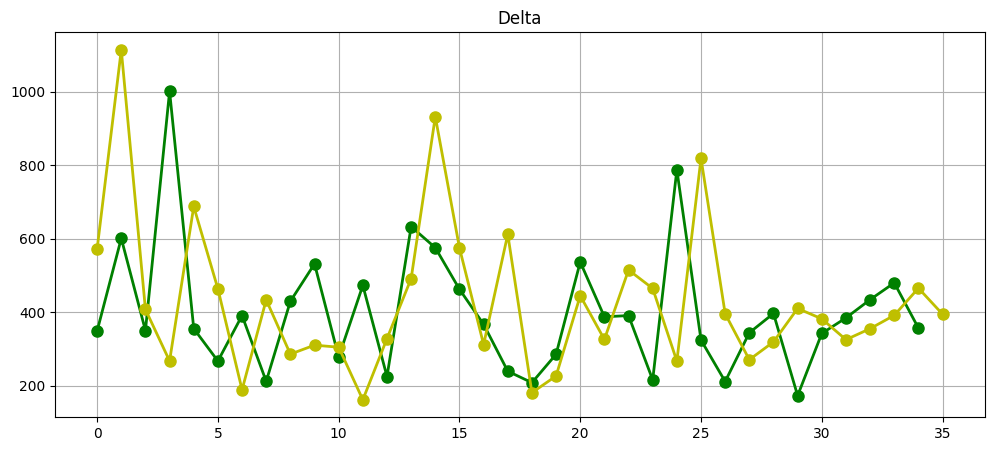

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(df_rest['Delta'], marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(df_task['Delta'],  marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Delta')
plt.show()

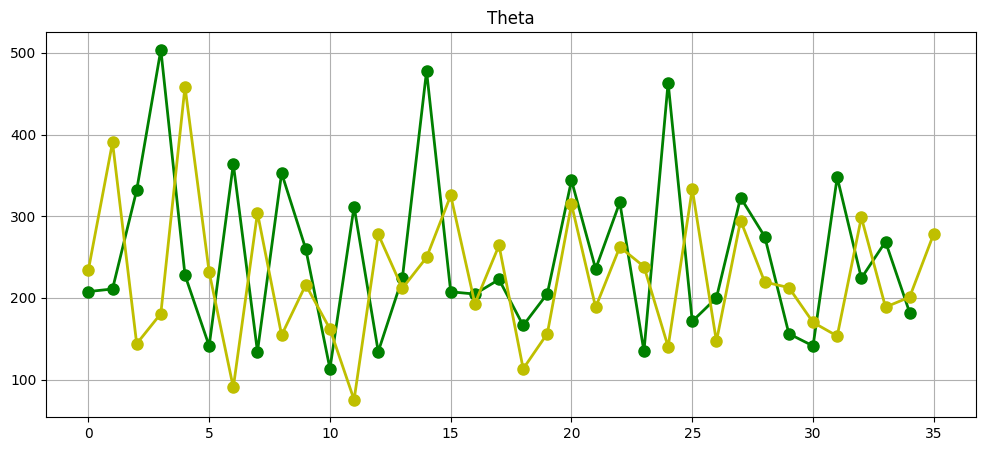

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(df_rest['Theta'], marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(df_task['Theta'],  marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Theta')
plt.show()

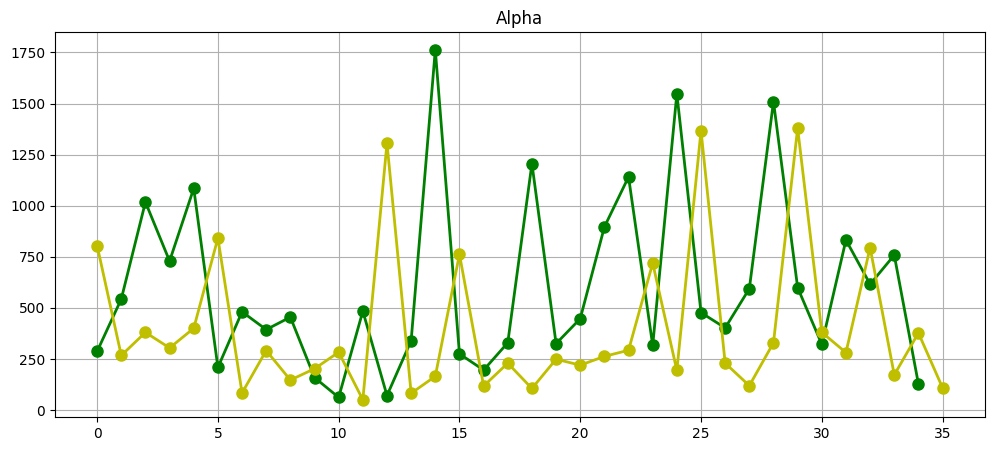

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df_rest['Alpha'], marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(df_task['Alpha'],  marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Alpha')
plt.show()

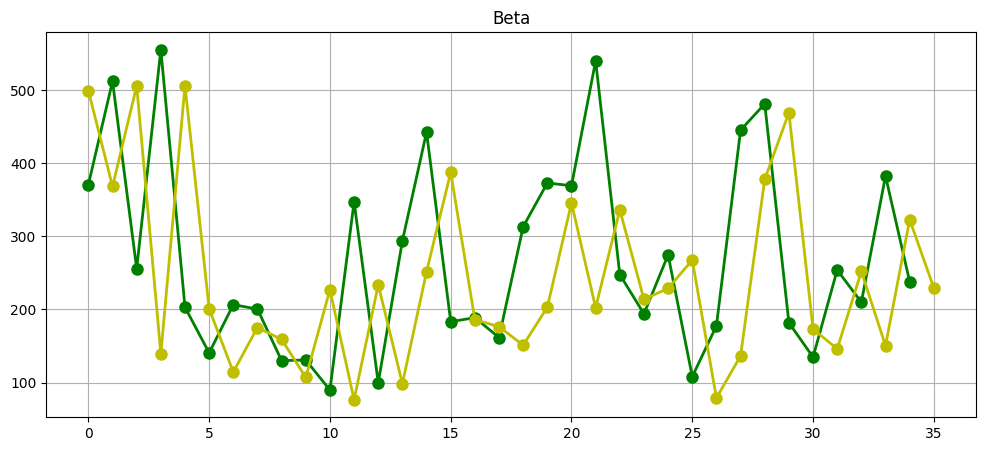

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(df_rest['Beta'], marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(df_task['Beta'],  marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Beta')
plt.show()

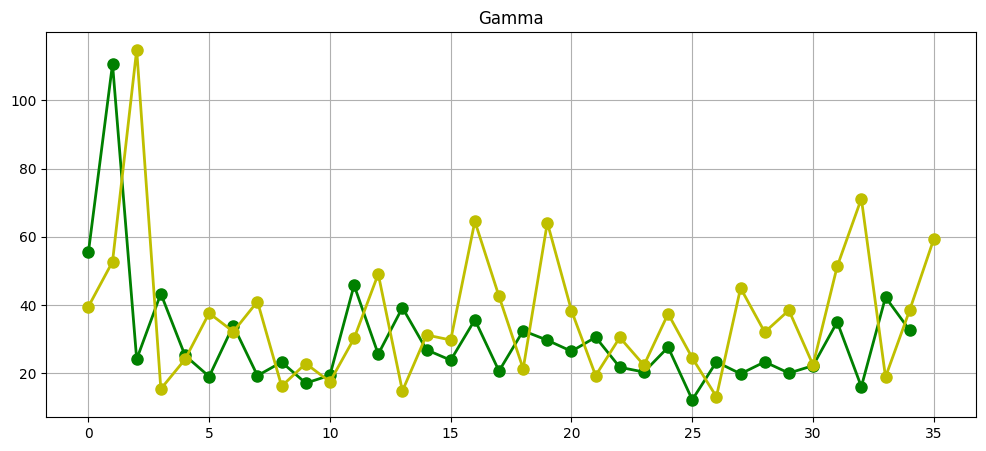

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(df_rest['Gamma'], marker='o', color='g', linestyle='-', linewidth=2, markersize=8)
plt.plot(df_task['Gamma'],  marker='o', color='y', linestyle='-', linewidth=2, markersize=8)
plt.grid(True)
plt.title('Gamma')
plt.show()